<a href="https://colab.research.google.com/github/g8428/TIL/blob/master/220225_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
tf.__version__

'2.8.0'

In [52]:
!pip install tensorflow==2.3.0

In [54]:
tf.__version__

'2.8.0'

In [5]:
a = tf.constant(2.0) # 변하지않는수
y = tf.constant(8.0)
x = tf.Variable(10.0) # 변수

print(a)
print(x)

tf.Tensor(2.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>


In [13]:
loss = tf.math.abs(a*x - y)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

In [14]:
loss.numpy()

12.0

In [16]:
def train_func():
    #  미분  사용하기
    with tf.GradientTape() as tape:
        # loss 함수에서 loss 구하기
        loss = tf.math.abs(a*x - y)
        print('loss : {}, type : {}'.format(loss,type(loss)))

    # loss에 대해 x로 미분
    dx = tape.gradient(loss, x) 
    # x와 기울기 출력
    print('x = {}, dx = {}'.format(x.numpy(), dx))

    # 가중치 업데이트(재할당)
    x.assign(x - dx)

for i in range(4):
    train_func()

loss : 0.0, type : <class 'tensorflow.python.framework.ops.EagerTensor'>
x = 4.0, dx = 0.0
loss : 0.0, type : <class 'tensorflow.python.framework.ops.EagerTensor'>
x = 4.0, dx = 0.0
loss : 0.0, type : <class 'tensorflow.python.framework.ops.EagerTensor'>
x = 4.0, dx = 0.0
loss : 0.0, type : <class 'tensorflow.python.framework.ops.EagerTensor'>
x = 4.0, dx = 0.0


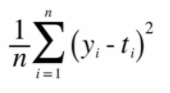

In [ ]:
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1,w2,b]

#mse 구하기
squared = tf.square(w1*x*x + w2*x + b - y)
mse = tf.reduce_mean(squared)
#rmse
rmse = tf.sqrt(mse)
loss = rmse
#loss
histLoss = []
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))
    
    dw1,dw2,db = tape.gradient(loss, var_list)

    # w1.assign(w1 - lr*dw1)
    w1.assign_sub(lr*dw1)
    w2.assign_sub(lr*dw2)
    b.assign_sub(lr*db)

    histLoss.append(loss)
    if epoch % 50 == 0:
        print(f'epoch = {epoch}, loss = {loss}')

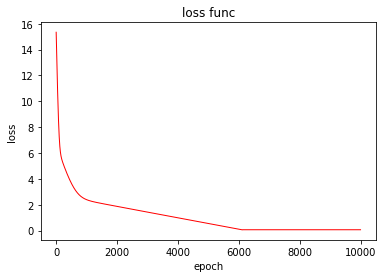

In [22]:
plt.plot(histLoss, color='red', linewidth = 1)
plt.title('loss func')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show();

In [23]:
from tensorflow.keras import optimizers

In [25]:
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1,w2,b]

#최적화설정 - ada 모멘텀, ada 그래디언트 등
opt = optimizers.SGD(learning_rate=lr, momentum=0.7) # 스토캐스틱 그래디언트 디센트


#mse 구하기
squared = tf.square(w1*x*x + w2*x + b - y)
mse = tf.reduce_mean(squared)
#rmse
rmse = tf.sqrt(mse)
loss = rmse
#loss
histLoss = []
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))
    
    grads = tape.gradient(loss, var_list)
    
    # 가중치 업데이트
    opt.apply_gradients(zip(grads,var_list))

    histLoss.append(loss)
    if epoch % 500 == 0:
        print(f'epoch = {epoch}, loss = {loss}')


epoch = 0, loss = 15.339600563049316
epoch = 500, loss = 2.023297071456909
epoch = 1000, loss = 1.2853883504867554
epoch = 1500, loss = 0.5479283332824707
epoch = 2000, loss = 0.0375760979950428
epoch = 2500, loss = 0.03759327903389931
epoch = 3000, loss = 0.03759327903389931
epoch = 3500, loss = 0.03759327903389931
epoch = 4000, loss = 0.03759327903389931
epoch = 4500, loss = 0.03759327903389931
epoch = 5000, loss = 0.03759327903389931
epoch = 5500, loss = 0.03759327903389931
epoch = 6000, loss = 0.03759327903389931
epoch = 6500, loss = 0.03759327903389931
epoch = 7000, loss = 0.03759327903389931
epoch = 7500, loss = 0.03759327903389931
epoch = 8000, loss = 0.03759327903389931
epoch = 8500, loss = 0.03759327903389931
epoch = 9000, loss = 0.03759327903389931
epoch = 9500, loss = 0.03759327903389931


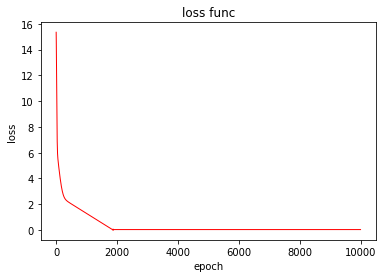

In [26]:
plt.plot(histLoss, color='red', linewidth = 1)
plt.title('loss func')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show();

ADAM으로 해보기

In [30]:
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]

#Momentum 적용 # ADAM
opt = optimizers.Adam(learning_rate=lr)

def loss():
    return tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))

histLoss = []
for epoch in range(10000):
    opt.minimize(loss, var_list=var_list)

    histLoss.append(loss())
    if epoch % 500 == 0:
        print(f"epoch = {epoch}, loss = {histLoss[-1]}")


epoch = 0, loss = 15.327645301818848
epoch = 500, loss = 9.454402923583984
epoch = 1000, loss = 4.24637508392334
epoch = 1500, loss = 1.924774408340454
epoch = 2000, loss = 1.4152452945709229
epoch = 2500, loss = 1.0947701930999756
epoch = 3000, loss = 0.7711126804351807
epoch = 3500, loss = 0.44227054715156555
epoch = 4000, loss = 0.11060574650764465
epoch = 4500, loss = 0.0014593740925192833
epoch = 5000, loss = 0.0010765924816951156
epoch = 5500, loss = 0.000934886746108532
epoch = 6000, loss = 0.0008642280008643866
epoch = 6500, loss = 0.0008157610427588224
epoch = 7000, loss = 0.0007883155485615134
epoch = 7500, loss = 0.0008120921556837857
epoch = 8000, loss = 0.0008039077511057258
epoch = 8500, loss = 0.0007456461316905916
epoch = 9000, loss = 0.0006982177728787065
epoch = 9500, loss = 0.0006752163171768188


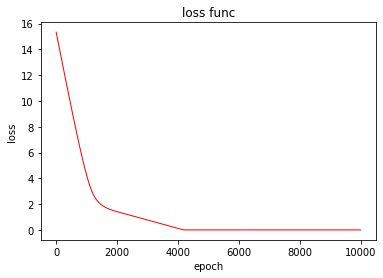

In [31]:
plt.plot(histLoss, color='red', linewidth = 1)
plt.title('loss func')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show();

## Keras
- 반복작업 줄이기
- 텐서플로를 쉽게 쓸 수 있는 프레임워크
- tensorflow.keras에서 import
- keras코드를 쓰면 내부적으로 tensorflow 기능 동작
- 케라스는 Sequential 방식, functional API 방식
- Tensorflow만 설치하면 내장된 keras 사용가능

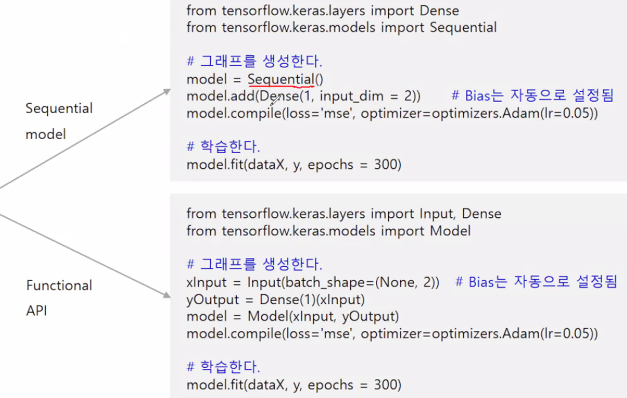

- Sequential

In [126]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5

dataX = np.stack([x*x, x]).T

In [127]:
model = Sequential()
model.add(Dense(1,input_dim=2)) # 시퀀셜하게 모델을 붙이기
model.compile(loss='mse', optimizer=optimizers.RMSprop(lr=0.05))
h = model.fit(dataX,y,batch_size=10, epochs=300) #10개씩 300번 돌리기


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Train on 100 samples
Epoch 1/300
100/100 [==============================] - 1s 9ms/sample - loss: 1372.3911
Epoch 2/300
100/100 [==============================] - 0s 275us/sample - loss: 920.6666
Epoch 3/300
100/100 [==============================] - 0s 319us/sample - loss: 633.5316
Epoch 4/300
100/100 [==============================] - 0s 286us/sample - loss: 417.7720
Epoch 5/300
100/100 [==============================] - 0s 282us/sample - loss: 258.6115
Epoch 6/300
100/100 [==============================] - 0s 228us/sample - loss: 143.0222
Epoch 7/300
100/100 [==============================] - 0s 267us/sample - loss: 67.3801
Epoch 8/300
100/100 [==============================] - 0s 307us/sample - loss: 25.0402
Epoch 9/300
100/100 [==============================] - 0s 242us/sample - loss: 6.6221
Epoch 10/300
100/100 [==============================] - 0s 253us/sample - loss: 1.6256
Epoch 11/300
100/100 [==============================] - 0s 252us/sample - loss: 0.6905
Epoch 12/300
100/1

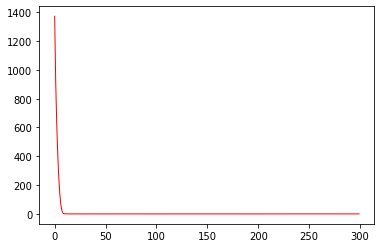

In [128]:
plt.plot(h.history['loss'],color='red',linewidth=1)
plt.show()

In [129]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [130]:
params = model.layers[0].get_weights() # w값 보기
print('w1 : {:.2f}'.format(params[0][0][0]))
print('w2 : {:.2f}'.format(params[0][1][0]))
print('b : {:.2f}'.format(params[1][0]))

w1 : 2.00
w2 : 3.01
b : 5.01


원래 식이었던 $y = 2x^2 + 3x + 5$ 를 추정

## Functional API

In [42]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [45]:
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5

dataX = np.stack([x*x, x]).T

xInput = Input(batch_shape=(None, dataX.shape[1]))
yOutput = Dense(1)(xInput)
model = Model(xInput, yOutput)
model.compile(loss='mse', optimizer = optimizers.Adam(learning_rate = 0.05))

h = model.fit(dataX,y,batch_size = 10, epochs=300)


Epoch 1/300
10/10 [==============================] - 1s 3ms/step - loss: 271.5559
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 139.1386
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 76.1278
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 49.6208
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 36.0500
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 25.4374
Epoch 7/300
10/10 [==============================] - 0s 3ms/step - loss: 17.4319
Epoch 8/300
10/10 [==============================] - 0s 4ms/step - loss: 11.8942
Epoch 9/300
10/10 [==============================] - 0s 6ms/step - loss: 8.5835
Epoch 10/300
10/10 [==============================] - 0s 4ms/step - loss: 6.1773
Epoch 11/300
10/10 [==============================] - 0s 5ms/step - loss: 4.6027
Epoch 12/300
10/10 [==============================] - 0s 4ms/step - loss: 3.6871
Epoch 13/300
10/10 [=======

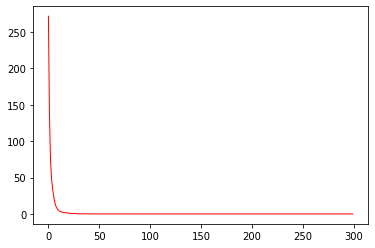

In [47]:
plt.plot(h.history['loss'],color='red',linewidth=1)
plt.show()

In [48]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [49]:
params = model.layers[1].get_weights() # w값 보기
print('w1 : {:.2f}'.format(params[0][0][0]))
print('w2 : {:.2f}'.format(params[0][1][0]))
print('b : {:.2f}'.format(params[1][0]))

w1 : 2.00
w2 : 3.00
b : 5.00


텐서플로 사용 실습데이터(붓꽃데이터)

In [64]:
import tensorflow.compat.v1 as tf

In [51]:
tf.__version__

'2.8.0'

In [66]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [58]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [59]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = pd.get_dummies(iris.target).to_numpy()

In [61]:
iris_y[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [62]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(iris_X,iris_y,
                                                    test_size = 0.3,
                                                    random_state=42)


compat v1 *방식* 매우 불편함

In [67]:
# x,y의 변수 선언
x = tf.placeholder(tf.float32, [None, 4]) # 변수의 수 4개
y = tf.placeholder(tf.float32, [None, 3]) # 정답 클래스가 3개

In [68]:
W = tf.Variable(tf.zeros([4,3])) #W값, weight shape(입력수, 출력수)
b = tf.Variable(tf.zeros([3])) #bias shape(출력갯수)

In [69]:
# 출력
h = tf.nn.softmax(tf.matmul(x,W)+b)

In [70]:
# 손실함수 정의
cross_entropy = -tf.reduce_sum(y*tf.log(h),reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)

In [71]:
# 학습 - loss함수, optimizer 정의도 같이
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [72]:
# 텐서플로 기본 사전코드
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [75]:
for i in range(50000):
    # 학습 돌려서 loss 값 받아오기
    _, loss_values = sess.run([train, loss], feed_dict={x:train_X, y:train_y})
    if i % 10000 ==0:
        print(i, loss_values)

0 0.37425944
10000 0.28379792
20000 0.23611486
30000 0.20631169
40000 0.18581778


In [76]:
# accuracy 구하기
# 아까 쓴 h값과 softmax 돌린 값 사용
correct_prediction = tf.equal(tf.argmax(h,1),tf.argmax(y,1))

In [79]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy,feed_dict={x:test_X, y:test_y}))

1.0


### compat v2 방식 : tensorflow 2.0 >=

In [80]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [82]:
n_features = train_X.shape[1]
# 모델 그래프 객체 생성
model = Sequential()

# 레이어 추가
model.add(Dense(10, activation='relu', kernel_initializer='he_normal',
                input_shape=(n_features, )))
model.add(Dense(8,activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation = 'softmax'))

In [92]:
# 최적화 옵션
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 최적화옵션, 로스(목적)함수, 평가지표


In [93]:
model.fit(train_X, np.argmax(train_y, axis=1),batch_size=32, epochs=300,verbose = 0)

In [94]:
loss, acc = model.evaluate(test_X, np.argmax(test_y, axis=1), verbose=0)
print(f'test accuracy : {acc}')

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


test accuracy : 1.0


In [96]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.005, decay=0.0),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_X, np.argmax(train_y, axis=1),batch_size=32, epochs=300,verbose = 0)
loss, acc = model.evaluate(test_X, np.argmax(test_y, axis=1), verbose=0)
print(f'test accuracy : {acc}')

test accuracy : 1.0


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


## Functional API

In [125]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

n_features = train_X.shape[1]

# 시퀀셜은 모델 자체에  순서가 정해져 있는 방식
# 펑셔널은 인풋 구멍뚫어놓고 레이어별로 변수할당해서 지정하는 방식
xInput = Input(batch_shape=(None, n_features))

W1 = Dense(10, activation='relu',kernel_initializer='he_normal')(xInput)
W2 = Dense(8, activation='relu',kernel_initializer='he_normal')(W1)
yOutput = Dense(3, activation = 'softmax')(W2)
model = Model(xInput, yOutput)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 0.005,decay=0.0),
              metrics=['accuracy'])

model.fit(train_X,np.argmax(train_y,axis=1),batch_size = 10, epochs=300,verbose=0)
loss,acc = model.evaluate(test_X,np.argmax(test_y,axis=1))
print(f'test acc : {acc}')

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


test acc : 0.9777777791023254


# 딥러닝 기반 자연어처리 시작